In [39]:
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, RobustScaler

os.getcwd()
os.chdir('/Users/macbook/Downloads')

df = pd.read_csv('creditcard.csv')

### EDA 

In [40]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
265773,162044.0,2.188019,-1.454499,-1.320750,-1.661143,-1.072083,-0.836261,-0.793112,-0.199730,-1.647800,...,-0.365160,-0.821565,0.287000,-0.419541,-0.361870,-0.427874,-0.029225,-0.056759,72.00,0
140980,84066.0,-1.424899,0.237181,2.051677,1.736488,-0.642062,0.872053,-0.512725,1.034835,0.275278,...,-0.202004,-0.451806,0.123525,0.211615,-0.092752,-0.402072,0.300500,0.041612,65.80,0
104657,69174.0,-0.938092,0.571518,1.402057,-0.254181,-0.199475,-0.175611,1.137790,-0.013615,-1.000862,...,-0.295726,-0.985278,0.186331,0.215791,-0.190600,0.755145,-0.118648,0.024903,125.15,0
276710,167255.0,-1.100239,-1.203559,-2.440937,-0.283915,-1.496214,0.152375,3.506333,-0.138000,-0.548780,...,0.785392,0.841792,2.088146,0.613334,-1.452970,0.278936,-0.124616,0.335585,784.92,0
156336,107897.0,1.980909,-0.195298,-0.157262,0.560367,-0.687557,-0.807971,-0.546978,-0.167634,2.666153,...,-0.266749,-0.421703,0.362197,-0.083971,-0.408177,-0.965077,0.028272,-0.032272,11.27,0


In [41]:
print(df.shape)
print(df.dtypes)

(284807, 31)
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [42]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
# Find number of empty cells within the dataset

df.isnull().sum().max()

0

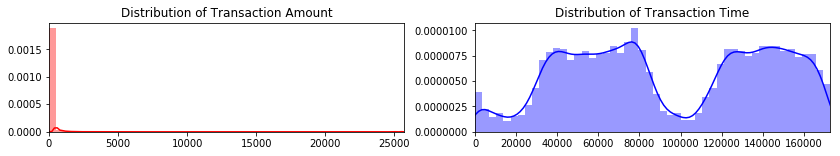

In [44]:
# Examine distribution of transaction amount and transaction time within the dataset  

fig, ax = plt.subplots(1, 2, figsize=(14,2))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=12)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=12)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Not Frauds 99.827 %
Frauds 0.173 %


Text(0.5, 1.0, 'Class Distributions, (0: No Fraud || 1: Fraud)')

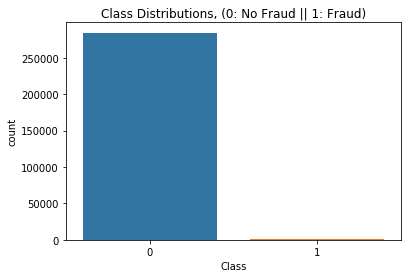

In [45]:
print('Not Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,3),'%')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,3),'%')

sns.countplot('Class', data=df)
plt.title('Class Distributions, (0: No Fraud || 1: Fraud)', fontsize=12)

In [46]:
Fraud = df[df['Class']==1]
Normal = df[df['Class']==0]

print(Fraud.Amount.describe())
print("="*50)
print(Normal.Amount.describe())

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


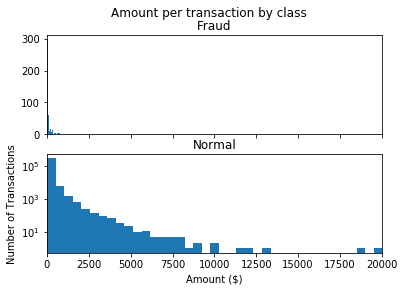

In [47]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

- The dataset is greatly imbalanced. There are 284315 cases (99.8%) genuine transactions vs. 492 cases (0.17%) fraudulent transactions
- It is noticed that all of the fraudulent transactions are below $2500 where as normal transactions are well dispersed

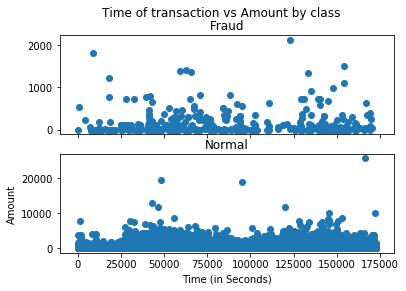

In [48]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

- Does not seem like there is a obvious relationship between either fraudulent or normal transactions made vs. time

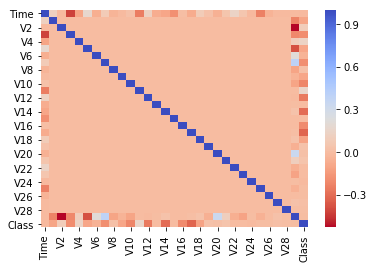

In [49]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})

In [65]:
df[df.columns[:]].corr()['Class'][:]

V1              -0.101347
V2               0.091289
V3              -0.192961
V4               0.133447
V5              -0.094974
V6              -0.043643
V7              -0.187257
V8               0.019875
V9              -0.097733
V10             -0.216883
V11              0.154876
V12             -0.260593
V13             -0.004570
V14             -0.302544
V15             -0.004223
V16             -0.196539
V17             -0.326481
V18             -0.111485
V19              0.034783
V20              0.020090
V21              0.040413
V22              0.000805
V23             -0.002685
V24             -0.007221
V25              0.003308
V26              0.004455
V27              0.017580
V28              0.009536
Class            1.000000
scaled_amount    0.005632
scaled_time     -0.012323
Name: Class, dtype: float64

#### All features except 'Time' and 'Amount' are scaled as result of PCA, let's scale these two features as well

In [50]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
148482,89940.0,2.007708,-0.149373,-1.271660,0.244331,0.191810,-0.465625,0.079338,-0.111486,0.289687,...,0.301502,0.781272,-0.209678,0.218924,-0.083094,-0.064066,12.83,0,-0.128135,0.061655
32445,36807.0,1.189620,0.393795,-0.622345,0.729218,0.155178,-0.715830,0.076581,0.096090,-0.088205,...,-0.039488,-0.155831,0.391677,0.388877,-0.032796,0.024407,0.76,0,-0.296793,-0.562565
51987,45228.0,1.107582,0.204404,0.440740,1.275194,-0.012206,0.164398,0.043726,0.072011,-0.119431,...,-0.094002,0.053507,0.663698,-0.333672,0.041167,0.009190,16.13,0,-0.082023,-0.463633
208953,137345.0,-0.210253,0.713182,0.596531,-0.727823,0.574395,-0.148209,0.529316,0.116821,-0.256401,...,0.269093,0.673617,-1.282972,0.037443,0.183958,0.256097,32.85,0,0.151610,0.618581
13956,24767.0,1.265478,0.375183,0.657335,0.821632,-0.391442,-0.940813,-0.023185,-0.293136,1.310498,...,0.146941,0.317257,0.199678,0.055919,-0.054766,0.012688,0.89,0,-0.294977,-0.704014


### Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#dropping the actual time and amount colummns since they are not scaled, keeping the scaled time and amount
df= df.drop(['Time','Amount'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Check the Distribution of the labels and see if both the train and test label distribution are 
# similarly distributed

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


### Random under-sampling to deal with the imbalance issue

In [52]:
# count the number of fraudulent transcation
(df['Class'] != 0).sum()

492

In [53]:
# Under sample the amount of genuine transation to 492 entries to deal with the imbalance issue 
df = df.sample(frac=1, random_state=42)
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.sample(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
149577,0.007379,2.365183,-2.600287,1.111602,3.276441,-1.776141,2.114531,-0.830084,0.900490,-3.376177,...,-0.902100,-0.404382,-0.012944,0.589836,-0.734449,-0.447529,-0.362375,1,-0.293440,0.080006
188412,2.025623,-0.970164,-0.585644,-0.373843,-1.138508,-0.682926,-0.730518,0.019774,-0.206242,0.996165,...,-1.950961,0.605240,-0.048708,-0.888348,0.032127,-0.050595,-0.051197,0,0.205687,0.508335
113740,-5.136552,5.746647,-3.838599,-0.329163,1.288327,0.251632,1.442205,-0.379463,5.509988,8.457899,...,0.247433,0.182054,-1.486916,0.106656,-0.649515,-0.708468,-2.730412,0,-0.296374,-0.135199
265204,1.831815,-0.286837,-1.995124,0.223964,0.468386,-0.274125,0.104953,-0.059870,0.731709,-0.727019,...,-0.496553,0.065398,0.176118,-0.042037,-0.125864,-0.032586,-0.011318,0,1.190666,0.905685
22663,1.167267,-0.756461,0.118052,-0.809707,-0.563844,0.109851,-0.530371,0.113432,-1.184111,0.704079,...,0.866733,-0.125770,-0.246409,0.431517,-0.081873,0.011426,0.005278,0,0.779012,-0.614728


In [54]:
new_df.shape # new_df = the random undersample data with 492 fraudulent and 492 non-fraudulent 

(984, 31)

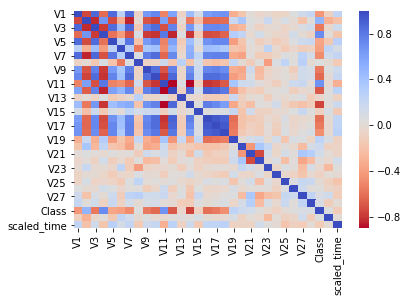

In [55]:
undersample_corr = new_df.corr()
sns.heatmap(undersample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In [66]:
new_df[new_df.columns[:]].corr()['Class'][:]

V1              -0.430676
V2               0.490349
V3              -0.563496
V4               0.717834
V5              -0.370061
V6              -0.386495
V7              -0.475045
V8               0.058153
V9              -0.558755
V10             -0.626376
V11              0.683459
V12             -0.679680
V13             -0.043471
V14             -0.748671
V15             -0.094396
V16             -0.598676
V17             -0.561101
V18             -0.473211
V19              0.247742
V20              0.160407
V21              0.130347
V22              0.030112
V23             -0.016247
V24             -0.076578
V25              0.007091
V26              0.044197
V27              0.084914
V28              0.091795
Class            1.000000
scaled_amount    0.065625
scaled_time     -0.132689
Name: Class, dtype: float64

### Dimensionality Reduction and Clustering 

In [31]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1e+01 s
PCA took 0.085 s
Truncated SVD took 0.011 s


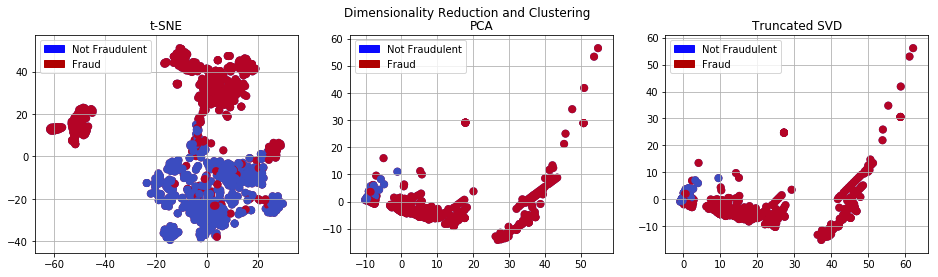

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
f.suptitle('Dimensionality Reduction and Clustering', fontsize=12)

blue = mpatches.Patch(color='#0A0AFF', label='Not Fraudulent')
red = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=12)

ax1.grid(True)

ax1.legend(handles=[blue, red])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=12)

ax2.grid(True)

ax2.legend(handles=[blue, red])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not Fraudulent', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=12)

ax3.grid(True)

ax3.legend(handles=[blue, red])

plt.show()

### LogisticRegression, KNN, SVC, DecisionTree, and GaussianNB Classifier 

In [33]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XG Boost": xgb.XGBClassifier(random_state=42,learning_rate=0.01)
}

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(classifier.__class__.__name__, "training score =", round(training_score.mean(), 2) * 100, "%")

LogisticRegression training score = 95.0 %
KNeighborsClassifier training score = 93.0 %
SVC training score = 94.0 %
DecisionTreeClassifier training score = 89.0 %
GaussianNB training score = 93.0 %
RandomForestClassifier training score = 94.0 %
XGBClassifier training score = 94.0 %


### Grid Search CV to find the best parameters

In [34]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

